In [9]:
from mpl_toolkits import mplot3d

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 3D test

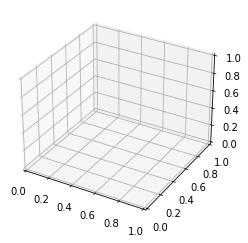

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')

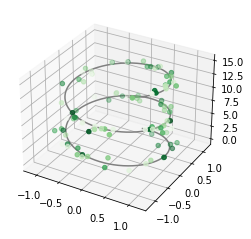

In [12]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
val_data = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=val_data, cmap='Greens')

## extract data (1986-1991 by average value)

In [13]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from autots import AutoTS
import pathlib
import json

In [14]:
gelman_data = pd.read_excel("../../result(new)/joined_well_data.xlsx")
gelman_data.head(5)

,Unnamed: 0,Bore,Name,Depth1,Depth2,SampleDate,Value,Comment,Enabled,Easting,...,utm_datum,utm_zone,utm_x,utm_y,utm_unit,pj4_x,pj4_y,pj4_paramstr,lat,lon
0,0,1021 Westview Way,1-4 Dioxane,260.0,268.0,2019-05-08,0.5,EGLE Lab,False,13274717.9,...,22,12,0,0,1,0,0,NaN,42.269732,-83.807344
1,1,1024 Westview Way,1-4 Dioxane,-9999.0,-9999.0,2019-05-08,0.5,EGLE Lab,False,13274221.6,...,22,12,0,0,1,0,0,NaN,42.269808,-83.809177
2,2,1049 Westview Way,1-4 Dioxane,272.0,280.0,2019-05-08,0.5,EGLE Lab,False,13274722.1,...,22,12,0,0,1,0,0,NaN,42.269390,-83.807331
3,3,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-03-27,0.5,NaN,False,13269250.0,...,22,12,0,0,1,0,0,NaN,42.285462,-83.827411
4,4,105 Myrtle,1-4 Dioxane,61.0,65.0,1999-05-28,0.5,NaN,False,13269250.0,...,22,12,0,0,1,0,0,NaN,42.285462,-83.827411


In [15]:
gelman_data.columns

Index(['Unnamed: 0', 'Bore', 'Name', 'Depth1', 'Depth2', 'SampleDate', 'Value',
       'Comment', 'Enabled', 'Easting', 'Northing', 'Elevation', 'TotalDepth',
       'CollarElevation', 'Comments', 'GEIcon', 'Color', 'SymbolTypeId',
       'NeedXYZCalc', 'dd_lon', 'dd_lat', 'lcs_x', 'lcs_y', 'lcs_unit',
       'pls_meridian', 'pls_range', 'pls_township', 'pls_section',
       'pls_offset_based', 'pls_x_offset', 'pls_y_offset', 'pls_fwl',
       'pls_fsl', 'pls_description', 'spc_zone', 'spc_x', 'spc_y', 'spc_unit',
       'utm_datum', 'utm_zone', 'utm_x', 'utm_y', 'utm_unit', 'pj4_x', 'pj4_y',
       'pj4_paramstr', 'lat', 'lon'],
      dtype='object')

### grouped by well name and filter by time period


In [16]:

zdata = []
val_data = []
xdata = []
ydata = []

grouped = gelman_data.groupby('Bore')
count = 0
start_date = datetime.datetime(1986, 1, 1)
end_date = datetime.datetime(1991, 12, 31)
for name, group in grouped:
    count += 1

    group.loc[:, 'ds'] = pd.to_datetime(group['SampleDate'])
    tmp = []
    for index, row in group.iterrows():
        ds = row['ds']
        if start_date <= ds <= end_date:
            tmp.append(row)
    df = pd.DataFrame(tmp)
    if len(tmp) > 0:
        mean_value = df["Value"].mean()
        xdata.append(pd.to_numeric(df['Easting'],errors ='ignore').iloc[0])
        ydata.append(pd.to_numeric(df['Northing'],errors ='ignore').iloc[0])
        depth = pd.to_numeric(df['Depth1'],errors ='ignore').iloc[0]
        if depth < 0:
            depth = 0
        zdata.append(-depth)
        val_data.append(mean_value)




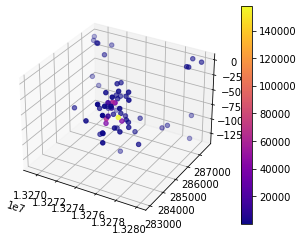

In [17]:

import pylab as plt


fig = plt.figure()
ax = plt.axes(projection='3d')
p = ax.scatter3D(xdata, ydata, zdata, c=val_data, cmap='plasma')
fig.colorbar(p)

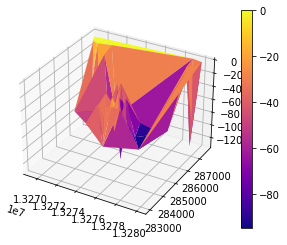

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
p = ax.plot_trisurf(xdata, ydata, zdata,
                cmap='plasma', edgecolor='none')
fig.colorbar(p)